# Exercise Practice 1 - Structured Dataset



---

---





## Exploratory Data Analysis (EDA)
Exploratory Data Analysis mengacu pada proses kritis melakukan penyelidikan awal pada data untuk menemukan pola, untuk menemukan anomali, untuk menguji hipotesis (statistik inferentif) dan untuk memeriksa asumsi dengan bantuan statistik deskriptif dan representasi grafis. [source](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- Matplotlib
- Seaborn
- Pandas
- Other Plotting Library

In [1]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler, MinMaxScaler


### Exploring The Data

In [3]:
# # Read dataset - Student Mental Health
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Ind/smh.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# select with no duplicated data
df = df[~df.duplicated()]

In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            101 non-null    object 
 1   Gender                               101 non-null    object 
 2   Age                                  100 non-null    float64
 3   Course                               101 non-null    object 
 4   Study                                101 non-null    object 
 5   CGPA                                 101 non-null    object 
 6   Marital status                       101 non-null    object 
 7   Depression                           101 non-null    object 
 8   Anxiety                              101 non-null    object 
 9   Panic Attack                         101 non-null    object 
 10  Seek any specialist for a treatment  101 non-null    object 
dtypes: float64(1), object(10)
memory

In [6]:
# Number of Unqie Value in Every Columns
df.nunique()

Timestamp                              92
Gender                                  2
Age                                     7
Course                                 49
Study                                   7
CGPA                                    6
Marital status                          2
Depression                              2
Anxiety                                 2
Panic Attack                            2
Seek any specialist for a treatment     2
dtype: int64

### Describe The Data

In [7]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [8]:
df

,Timestamp,Gender,Age,Course,Study,CGPA,Marital status,Depression,Anxiety,Panic Attack,Seek any specialist for a treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


## Data collection

In [61]:
datasets_1 = np.genfromtxt('/content/drive/MyDrive/Machine Learning Ind/smh.csv', delimiter=',', dtype=str)

for i in range(datasets_1.shape[0]):
    for j in range(datasets_1.shape[1]):
        datasets_1[i, j] = datasets_1[i, j].strip('.')
feature_and_labels_names = ["Timestamp", "Gender", "Age", "Course", "Study", "CGPA", "Marital status", "Depression", "Anxiety", "Panic attack", "Seek any specialist for a treatment"]

df = pd.DataFrame(datasets_1, columns=feature_and_labels_names)

In [64]:
for i in range(df.shape[1]):
    if len(np.unique(df.iloc[:, i])) <= 1:
        print(i)
    else:
        print(i, len(np.unique(df.iloc[:, i])))

0 93
1 3
2 9
3 50
4 8
5 7
6 3
7 3
8 3
9 3
10 3


In [67]:
print(df.shape)
for i in range(len(datasets_1)):
    n = datasets_1[i, 10]
    if isinstance(n, (str, float)):
        # Konversi ke string dan hapus whitespace
        datasets_1[i, 10] = str(n).strip()

print(df.shape)
df.drop_duplicates()
df.dropna()
df.isnull().sum()
print(df.shape)

(102, 11)
(102, 11)
(102, 11)


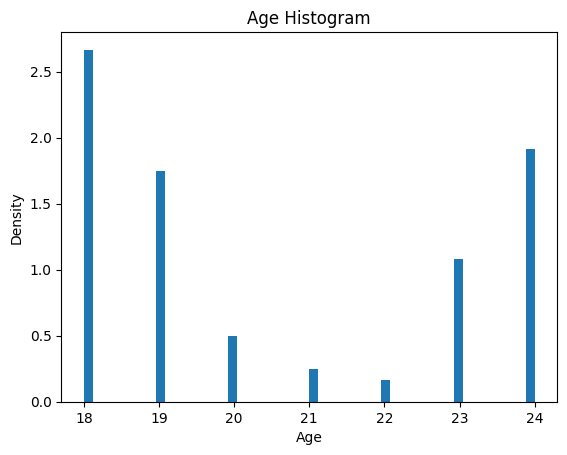

In [68]:

# Mengonversi kolom "Age" ke tipe data numerik (jika belum)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # 'coerce' akan mengubah nilai non-numerik menjadi NaN

# Menampilkan histogram jika data sudah dalam format numerik
if 'Age' in df.columns:
    ax = df['Age'].plot.hist(bins=50, density=True)

    ax.set_xlabel('Age')
    ax.set_ylabel('Density')
    ax.set_title('Age Histogram')

    plt.show()
else:
    print("Kolom 'Age' tidak ditemukan atau tidak dalam format numerik.")


Removing outliers

In [69]:
df = df.drop('CGPA', axis=1)
np.random.seed(5)
data = df.to_numpy()
np.random.shuffle(data)
y = data[:,-1]
data =np.delete(data,[5],axis = 1)

 Feature selection is done in this step that Education-num is deleted for the repetition.

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

categorical_features=[0,1,2,3,4]
categorical_names = {}
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_


t = [('Age', OneHotEncoder(),[0,1,2,3,4]),('Age',MinMaxScaler(),[0,1,2,3,4])]

transformer = ColumnTransformer(transformers=t)
le= LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
data = data.astype(str)

data_1 = data[0:3000]
y_1 = y[0:3000]

In [71]:
print(df.columns)

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Study', 'Marital status',
       'Depression', 'Anxiety', 'Panic attack',
       'Seek any specialist for a treatment'],
      dtype='object')


In [72]:
df

,Timestamp,Gender,Age,Course,Study,Marital status,Depression,Anxiety,Panic attack,Seek any specialist for a treatment
0,Timestamp,Gender,NaN,Course,Study,Marital status,Depression,Anxiety,Panic Attack,Seek any specialist for a treatment
1,8/7/2020 12:02,Female,18.0,Engineering,year 1,No,Yes,No,Yes,No
2,8/7/2020 12:04,Male,21.0,Islamic education,year 2,No,No,Yes,No,No
3,8/7/2020 12:05,Male,19.0,BIT,Year 1,No,Yes,Yes,Yes,No
4,8/7/2020 12:06,Female,22.0,Laws,year 3,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...
97,13/07/2020 19:56:49,Female,21.0,BCS,year 1,No,No,Yes,No,No
98,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,No,Yes,Yes,No,No
99,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,Yes,Yes,No,Yes,No
100,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,No,No,No,No,No


### Pie Diagram

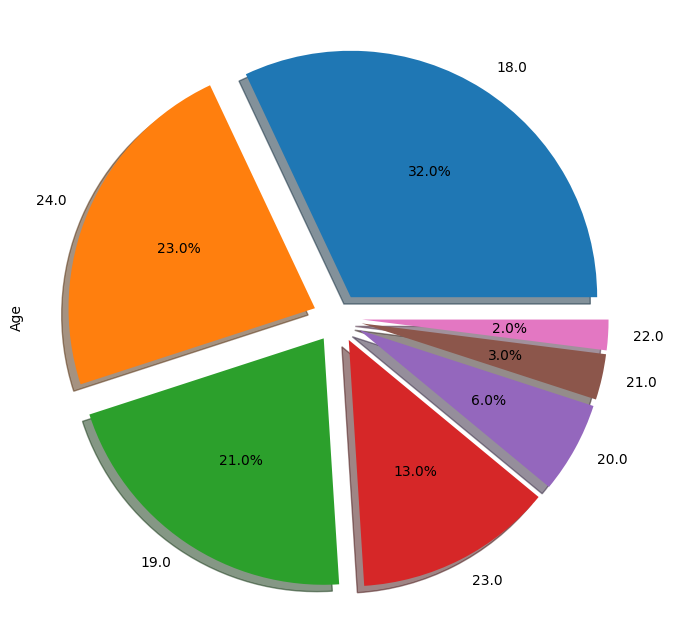

In [73]:
# Calculate the value counts for the 'Age' column
age_counts = df['Age'].value_counts()

# Create an explode list with the same length as unique age values
explode = [0.1] * len(age_counts)

# Plot the pie chart with explode
age_counts.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, figsize=(10, 8))
plt.show()


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            102 non-null    object 
 1   Gender                               102 non-null    object 
 2   Age                                  100 non-null    float64
 3   Course                               102 non-null    object 
 4   Study                                102 non-null    object 
 5   Marital status                       102 non-null    object 
 6   Depression                           102 non-null    object 
 7   Anxiety                              102 non-null    object 
 8   Panic attack                         102 non-null    object 
 9   Seek any specialist for a treatment  102 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.8+ KB


In [75]:
df['Gender']=df['Gender'].astype(str)
df['Age']=df['Age'].astype(float)
df['Course']=df['Course'].astype(str)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            102 non-null    object 
 1   Gender                               102 non-null    object 
 2   Age                                  100 non-null    float64
 3   Course                               102 non-null    object 
 4   Study                                102 non-null    object 
 5   Marital status                       102 non-null    object 
 6   Depression                           102 non-null    object 
 7   Anxiety                              102 non-null    object 
 8   Panic attack                         102 non-null    object 
 9   Seek any specialist for a treatment  102 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.8+ KB


### Boxplot
[Deskripsi Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


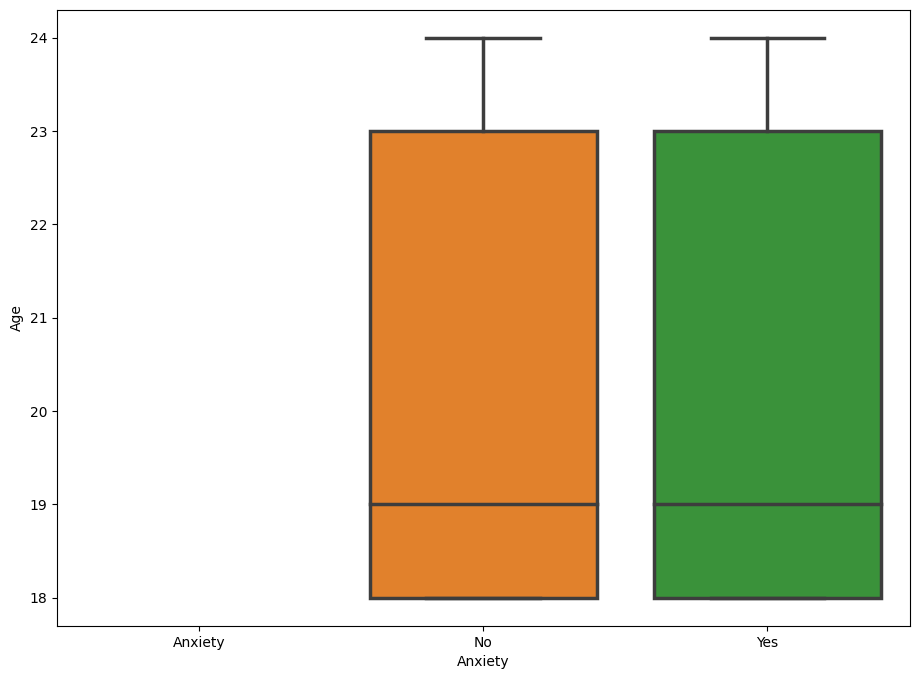

In [88]:
# Seaborn with Matplotlib
plt.figure(figsize=(11, 8))
sns.boxplot(x='Anxiety', y='Age', data=df, linewidth=2.5)
plt.show()

### Countplot and Barplot (with subplot)

`Countplot digunakan untuk menghitung jumlah sample, sedangkan Barplot salah satunya digunakan untuk menghitung rate/prosentase dari sample.`

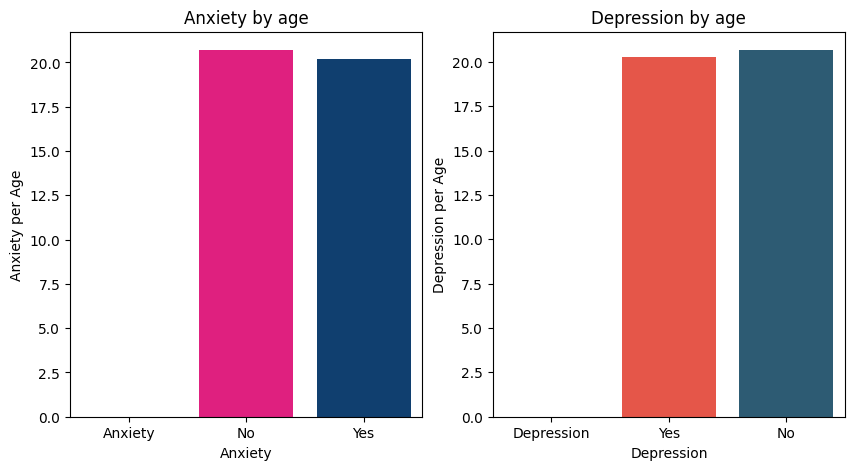

In [81]:
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
#a = sns.countplot(df['Age'], ax=axarr[0], palette=('#003f7f','#ff007f')).set_title('Income count by Age')
axarr[0].set_title('Anxiety by age')
axarr[1].set_title('Depression by age')

a = sns.barplot(x='Anxiety', y='Age', data=df, palette=('#003f7f','#ff007f'), errorbar=None, ax=axarr[0]).set_ylabel('Anxiety per Age')
b = sns.barplot(x='Depression', y='Age', data=df, palette=('#215f7f','#ff412f'), errorbar=None, ax=axarr[1]).set_ylabel('Depression per Age')

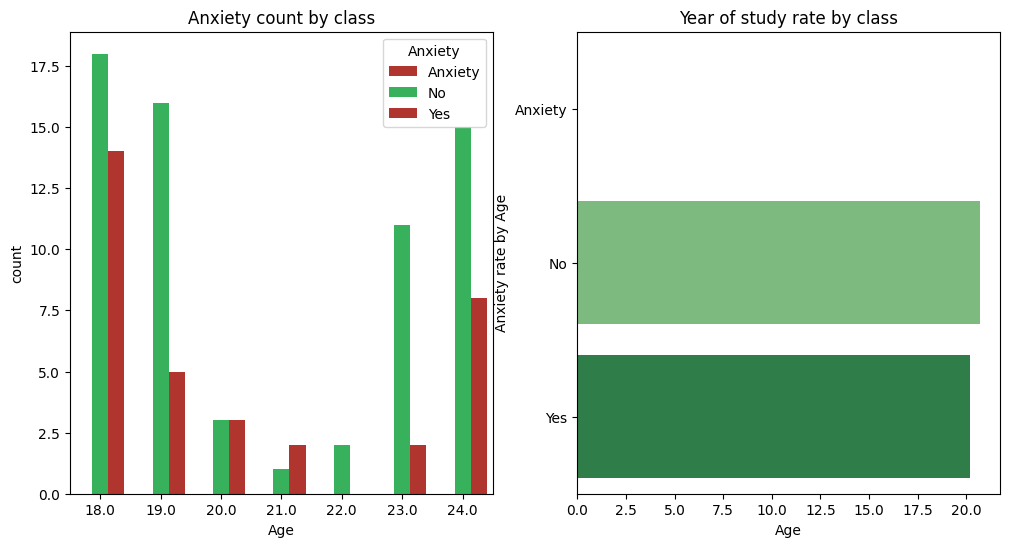

In [84]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Age', hue='Anxiety', data=df, palette=('#C52219', '#23C552'), ax=axarr[0]).set_title('Anxiety count by class')
ax=axarr[1].set_title('Year of study rate by class')
b = sns.barplot(x='Age', y='Anxiety', data=df, palette="Greens", errorbar=None, ax=axarr[1]).set_ylabel('Anxiety rate by Age')

## Methods for Encoding [1](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) & [2](https://towardsdatascience.com/5-categorical-encoding-tricks-you-need-to-know-today-as-a-data-scientist-73cf75595298) Before Modeling


- **Label Encoding** adalah pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritma pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan.
- **One Hot Encoding** adalah proses yang dikenal sebagai pengkodean variabel kategori menjadi variabel dummy. Metode pengolahan data ini mengubah kolom kategorikal biner (yes / no, male / female,…) menjadi vektor biner 0/1 dimana 0 menunjukkan tidak adanya baris yang termasuk dalam kategori tersebut. Metode ini bisa rumit jika digunakan untuk variabel multidimensi non-biner yang akan menghasilkan penambahan kolom yang tidak berguna. Misalnya, jika kita memiliki kolom yang mewakili x warna, satu pengkodean panas akan menghasilkan x kolom tambahan (warna_hijau, warna_biru,…).
- dll

In [85]:
dataset = df.copy()
dataset.head()

,Timestamp,Gender,Age,Course,Study,Marital status,Depression,Anxiety,Panic attack,Seek any specialist for a treatment
0,Timestamp,Gender,NaN,Course,Study,Marital status,Depression,Anxiety,Panic Attack,Seek any specialist for a treatment
1,8/7/2020 12:02,Female,18.0,Engineering,year 1,No,Yes,No,Yes,No
2,8/7/2020 12:04,Male,21.0,Islamic education,year 2,No,No,Yes,No,No
3,8/7/2020 12:05,Male,19.0,BIT,Year 1,No,Yes,Yes,Yes,No
4,8/7/2020 12:06,Female,22.0,Laws,year 3,Yes,Yes,No,No,No


In [86]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        dataset[c] = encoder.fit_transform(dataset[c])
    else: # else get the self column value without encode
        dataset[c] = dataset[c]

dataset.head()

,Timestamp,Gender,Age,Course,Study,Marital status,Depression,Anxiety,Panic attack,Seek any specialist for a treatment
0,Timestamp,1,NaN,12,0,0,0,0,1,1
1,8/7/2020 12:02,0,18.0,18,4,1,2,1,2,0
2,8/7/2020 12:04,2,21.0,26,5,1,1,2,0,0
3,8/7/2020 12:05,2,19.0,4,1,1,2,2,2,0
4,8/7/2020 12:06,0,22.0,34,6,2,2,1,0,0


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            102 non-null    object 
 1   Gender                               102 non-null    int64  
 2   Age                                  100 non-null    float64
 3   Course                               102 non-null    int64  
 4   Study                                102 non-null    int64  
 5   Marital status                       102 non-null    int64  
 6   Depression                           102 non-null    int64  
 7   Anxiety                              102 non-null    int64  
 8   Panic attack                         102 non-null    int64  
 9   Seek any specialist for a treatment  102 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 8.8+ KB
